<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pokémon-Overview" data-toc-modified-id="Pokémon-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pokémon Overview</a></span></li><li><span><a href="#Pokémon-Data" data-toc-modified-id="Pokémon-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pokémon Data</a></span><ul class="toc-item"><li><span><a href="#Indexes-and-Uniqueness" data-toc-modified-id="Indexes-and-Uniqueness-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Indexes and Uniqueness</a></span></li><li><span><a href="#Selecting-Specific-Columns" data-toc-modified-id="Selecting-Specific-Columns-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Selecting Specific Columns</a></span></li></ul></li><li><span><a href="#Selecting-Rows" data-toc-modified-id="Selecting-Rows-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Selecting Rows</a></span><ul class="toc-item"><li><span><a href="#Exact-Text-Matches" data-toc-modified-id="Exact-Text-Matches-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exact Text Matches</a></span></li><li><span><a href="#Partial-Text-Matching" data-toc-modified-id="Partial-Text-Matching-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Partial Text Matching</a></span></li></ul></li><li><span><a href="#Numerical-Conditions" data-toc-modified-id="Numerical-Conditions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Numerical Conditions</a></span></li><li><span><a href="#Grouping--and-Aggregation" data-toc-modified-id="Grouping--and-Aggregation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Grouping  and Aggregation</a></span><ul class="toc-item"><li><span><a href="#Counting-in-Groups" data-toc-modified-id="Counting-in-Groups-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Counting in Groups</a></span></li><li><span><a href="#Selecting-Record-with-a-MultiIndex" data-toc-modified-id="Selecting-Record-with-a-MultiIndex-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Selecting Record with a MultiIndex</a></span></li><li><span><a href="#Select-a-Record-by-Query" data-toc-modified-id="Select-a-Record-by-Query-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Select a Record by Query</a></span></li><li><span><a href="#Renaming-columns" data-toc-modified-id="Renaming-columns-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Renaming columns</a></span></li></ul></li><li><span><a href="#Basic-Plotting" data-toc-modified-id="Basic-Plotting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Basic Plotting</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Resetting-an-Index" data-toc-modified-id="Resetting-an-Index-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Resetting an Index</a></span></li><li><span><a href="#Correlation-Heatmap" data-toc-modified-id="Correlation-Heatmap-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Correlation Heatmap</a></span><ul class="toc-item"><li><span><a href="#get_duplicate_indexes" data-toc-modified-id="get_duplicate_indexes-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>get_duplicate_indexes</a></span></li></ul></li></ul></li><li><span><a href="#Download-Additional-Pokemon-Data" data-toc-modified-id="Download-Additional-Pokemon-Data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Download Additional Pokemon Data</a></span></li><li><span><a href="#Types" data-toc-modified-id="Types-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Types</a></span></li><li><span><a href="#Pokemon-Types" data-toc-modified-id="Pokemon-Types-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Pokemon Types</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Duplicated-Pokemon-Types" data-toc-modified-id="Duplicated-Pokemon-Types-10.0.1"><span class="toc-item-num">10.0.1&nbsp;&nbsp;</span>Duplicated Pokemon Types</a></span></li></ul></li></ul></li><li><span><a href="#Joining-DataFrames" data-toc-modified-id="Joining-DataFrames-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Joining DataFrames</a></span></li><li><span><a href="#Grouping-and-Plotting" data-toc-modified-id="Grouping-and-Plotting-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Grouping and Plotting</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Abilities" data-toc-modified-id="Abilities-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Abilities</a></span></li><li><span><a href="#Pokemon-to-Abilities-Mapping" data-toc-modified-id="Pokemon-to-Abilities-Mapping-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Pokemon to Abilities Mapping</a></span></li></ul></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Categorical Data</a></span></li></ul></div>

# Pokémon Overview

> The Pokémon franchise revolves around 807 fictional species of collectible monsters, each having unique designs and skills. Conceived by Satoshi Tajiri in early 1989, Pokémon are creatures that inhabit the fictional Pokémon World. The designs for the multitude of species can draw inspiration from anything, such as inanimate objects, real-world animals, or mythology. Many Pokémon are capable of evolving into more powerful species, while others can undergo form changes and achieve similar results. Originally, only a handful of artists led by Ken Sugimori designed Pokémon. However, by 2013 a team of 20 artists worked together to create new species designs. Sugimori and Hironobu Yoshida lead the team and determine the final designs. Each iteration of the series has brought about praise and criticism over the numerous creatures - https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

----

> Nintendo/Creatures Inc./GAME FREAK inc. Pokémon, Pokémon character names, Nintendo 3DS, Nintendo DS, Wii, Wii U, and Wiiware are trademarks of Nintendo - https://www.pokemon.com/us/legal/

This work is in no way affiliated with the fine people above. It is intended for educational purposes under fair use.

Image Credit: https://veekun.com/dex/pokemon/bulbasaur

<img src="static/Bulbasaur.png" />

In [1]:
import IPython
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Pokémon Data

Download the files from the interwebs and save it to my hard drive. Found a Github repo that has pokemon data as handy CSVs: https://github.com/veekun/pokedex

In [2]:
def download_file(url, destination, use_ssl = True):    
    r = requests.get(url, allow_redirects=True, verify = use_ssl)
    open(destination, "wb").write(r.content)
    return

In [3]:
download_file("https://github.com/veekun/pokedex/raw/master/pokedex/data/csv/pokemon.csv", 
              "pokemon.csv")

Load our downloaded CSV into a Pandas DataFrame

In [4]:
df_pokemon = pd.read_csv("pokemon.csv")

So what columns do we have?

In [5]:
df_pokemon.columns

Index(['id', 'identifier', 'species_id', 'height', 'weight', 'base_experience',
       'order', 'is_default'],
      dtype='object')

**Preview of Pokemon Data**

* **id** - The unique id for the Pokemon
* **identifier** - The name of the Pokemon
* **species_id** - ???
* **height** - The height of the Pokemon
* **weight** - The weight of the Pokemon
* **base_experience** - Experience required for the Pokemon to level up
* **order** - ???
* **is_default** - ???

In [6]:
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default
0,1,bulbasaur,1,7,69,64,1,1
1,2,ivysaur,2,10,130,142,2,1
2,3,venusaur,3,20,1000,236,3,1
3,4,charmander,4,6,85,62,5,1
4,5,charmeleon,5,11,190,142,6,1


How many Pokemon in total?

In [7]:
len(df_pokemon)

964

## Indexes and Uniqueness

So what's the very first column? It is the Index an automatically generated unique identifier for each row.

In [8]:
df_pokemon.index

RangeIndex(start=0, stop=964, step=1)

Our dataset has an `id` column. Which if it is unique we could use as our unique index.

So is the `id` column actually unique?

In [9]:
df_pokemon["id"].is_unique

True

Is the identifier column unique?

In [10]:
df_pokemon["identifier"].is_unique

True

So we could use it as the Index to uniquely identify each row.

In [11]:
df_pokemon = df_pokemon.set_index("id")
df_pokemon.head()

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
1,bulbasaur,1,7,69,64,1,1
2,ivysaur,2,10,130,142,2,1
3,venusaur,3,20,1000,236,3,1
4,charmander,4,6,85,62,5,1
5,charmeleon,5,11,190,142,6,1


## Selecting Specific Columns

If we only want the names:

In [12]:
df_pokemon["identifier"]

id
1               bulbasaur
2                 ivysaur
3                venusaur
4              charmander
5              charmeleon
               ...       
10153     araquanid-totem
10154    togedemaru-totem
10155       necrozma-dusk
10156       necrozma-dawn
10157      necrozma-ultra
Name: identifier, Length: 964, dtype: object

The above returns the column on it's own, however if we want multiple specific columns, as them as a list:

In [13]:
df_pokemon[["identifier", "base_experience"]]

,identifier,base_experience
id,,
1,bulbasaur,64
2,ivysaur,142
3,venusaur,236
4,charmander,62
5,charmeleon,142
...,...,...
10153,araquanid-totem,159
10154,togedemaru-totem,152
10155,necrozma-dusk,306


# Selecting Rows

## Exact Text Matches

Lets find the Pokemon called **electrode**. 

In [14]:
df_pokemon["identifier"] == "electrode"

id
1        False
2        False
3        False
4        False
5        False
         ...  
10153    False
10154    False
10155    False
10156    False
10157    False
Name: identifier, Length: 964, dtype: bool

What we have above is an Indexer, which states for each Rows Index if the condition was met.

We can use the Index to get the specific rows we want.

In [15]:
# get me electrode
is_electrode_index = df_pokemon["identifier"] == "electrode"
df_pokemon[is_electrode_index]

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
101,electrode,101,12,666,172,150,1


Because we set the `id` to be the Index we can also lookup by Index value

In [16]:
# get the pokemon with the Index value of 101
df_pokemon.loc[101]

identifier         electrode
species_id               101
height                    12
weight                   666
base_experience          172
order                    150
is_default                 1
Name: 101, dtype: object

We can also lookup by position in the DataFrame, which as position start counting from 0, we don't get **electrode** when at what is at position 101 we get **exeggcute**.

In [17]:
# get me the pokemon that's 10th in the dataframe
df_pokemon.iloc[101] # because 0 based index

identifier         exeggcute
species_id               102
height                     4
weight                    25
base_experience           65
order                    151
is_default                 1
Name: 102, dtype: object

In [18]:
df_pokemon[df_pokemon["identifier"] == "exeggcute"]

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
102,exeggcute,102,4,25,65,151,1


## Partial Text Matching

For a series (column) get the values as string and then apply  string `contains` operation to determine if a specific value in the series matches `"pika"`.

Also lets make a seperate DataFrame that just has Pikachus.

In [19]:
# find me the pikachus
pika_index = df_pokemon["identifier"].astype(str).str.contains("pika")
df_pikachus = df_pokemon[pika_index]
df_pikachus

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
25,pikachu,25,4,60,112,35,1
10080,pikachu-rock-star,25,4,60,112,37,0
10081,pikachu-belle,25,4,60,112,38,0
10082,pikachu-pop-star,25,4,60,112,39,0
10083,pikachu-phd,25,4,60,112,40,0
10084,pikachu-libre,25,4,60,112,41,0
10085,pikachu-cosplay,25,4,60,112,36,0
10094,pikachu-original-cap,25,4,60,112,42,0
10095,pikachu-hoenn-cap,25,4,60,112,43,0


How many Pikachus do we have?

In [20]:
len(df_pikachus)

14

That's more than I expected...
<img src="https://cdn.mainichi.jp/vol1/2017/08/09/20170809hpe00m0et008000q/8.jpg?1"/>
image credit: https://mainichi.jp/english/graphs/20170809/hpe/00m/0et/001000g/8

# Numerical Conditions

Let's get some basic summary statistics for the height of our pokemon.

In [21]:
df_pokemon["height"].mean()

12.464730290456432

In [22]:
df_pokemon["height"].std()

12.926254639816213

In [23]:
df_pokemon["height"].median()

10.0

Or a single call to to get summary statistics.

In [24]:
df_pokemon["height"].describe()

count    964.000000
mean      12.464730
std       12.926255
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max      145.000000
Name: height, dtype: float64

Lets get the tallest Pokemon in the highest quartile.

In [25]:
tallest_quartile_height = df_pokemon["height"].describe()["75%"]
print("tallest_quartile_height", tallest_quartile_height)

tallest_quartile_height 15.0


In [26]:
tallest_quartile_height_index = df_pokemon["height"] >= tallest_quartile_height

How many Pokemon are in the tallest quartile

In [27]:
len(df_pokemon[tallest_quartile_height_index])

274

How many are not in the tallest quartile?

In order to select rows that do **not** match an indexer use the '~' aka tilde character.

In [28]:
len(df_pokemon[~tallest_quartile_height_index])

690

# Grouping  and Aggregation

Let's apply some grouping by height and weight

In [29]:
df_pokemon.groupby(["height", "weight"])

## Counting in Groups
However we need to apply an operation to the Grouping in order for it be useful. So let's count.

The call to the count is wrapped in a DataFrame so it displays in a formatted table.

In [30]:
df_pokemon_grouped_height_weight = pd.DataFrame(
    df_pokemon.groupby(["height", "weight"])["identifier"].count()
)

# lets look at the first ten 10 rows
df_pokemon_grouped_height_weight.head(10)

identifier
height weight            
1      1                1
       2                1
       3                1
       6                1
       9999             1
2      1                1
       3                2
       5                2
       6                1
       7                2

This DataFrame is a little different to the ones we've seen thus far. As it has two indexes, the columns we grouped by:

In [31]:
df_pokemon_grouped_height_weight.index.names

FrozenList(['height', 'weight'])

## Selecting Record with a MultiIndex

In [32]:
df_pokemon_grouped_height_weight.loc[(1,9999)]

identifier    1
Name: (1, 9999), dtype: int64

Surely this must be an exceptional Pokemon in terms of weight?

In [33]:
df_pokemon["weight"].describe()

count     964.000000
mean      677.140041
std      1228.033923
min         1.000000
25%        85.750000
50%       289.000000
75%       680.500000
max      9999.000000
Name: weight, dtype: float64

Seems like it is the heaviest (or one of the heaviest) Pokemon, so which Pokemon is it?

## Select a Record by Query

That 1 pokemon with a height of 1 and a weight of 9999 is curious, what is it?

We could look it up using multiple indexes or we could write a query.

In [34]:
df_pokemon.query("height == 1 and weight == 9999")

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
790,cosmoem,790,1,9999,140,943,1


So which Pokemon happen to be...
<img src="http://i0.kym-cdn.com/entries/icons/original/000/000/056/itsover1000.jpg"/>

image credit: http://knowyourmeme.com/memes/its-over-9000

In [35]:
df_pokemon.query("weight >= 9000")

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
383,groudon,383,35,9500,302,491,1
750,mudsdale,750,25,9200,175,882,1
790,cosmoem,790,1,9999,140,943,1
797,celesteela,797,92,9999,257,950,1
10076,metagross-mega,376,25,9429,315,481,0
10078,groudon-primal,383,50,9997,347,492,0


## Renaming columns

The counted identifiers doesn't have a descriptive column name, so lets rename it.

What columns do we have in our grouped DataFrame?

In [36]:
df_pokemon_grouped_height_weight.columns

Index(['identifier'], dtype='object')

Let's rename that column by passing a list with the new column name.
If we had multiple columns we'd need to pass all of the column names in.

In [37]:
df_pokemon_grouped_height_weight.columns = ["pokemon_count"]
df_pokemon_grouped_height_weight.head(10)

pokemon_count
height weight               
1      1                   1
       2                   1
       3                   1
       6                   1
       9999                1
2      1                   1
       3                   2
       5                   2
       6                   1
       7                   2

# Basic Plotting

A pairplot is a simple way to visualise the distrubtions and pairwise relationships between variables.

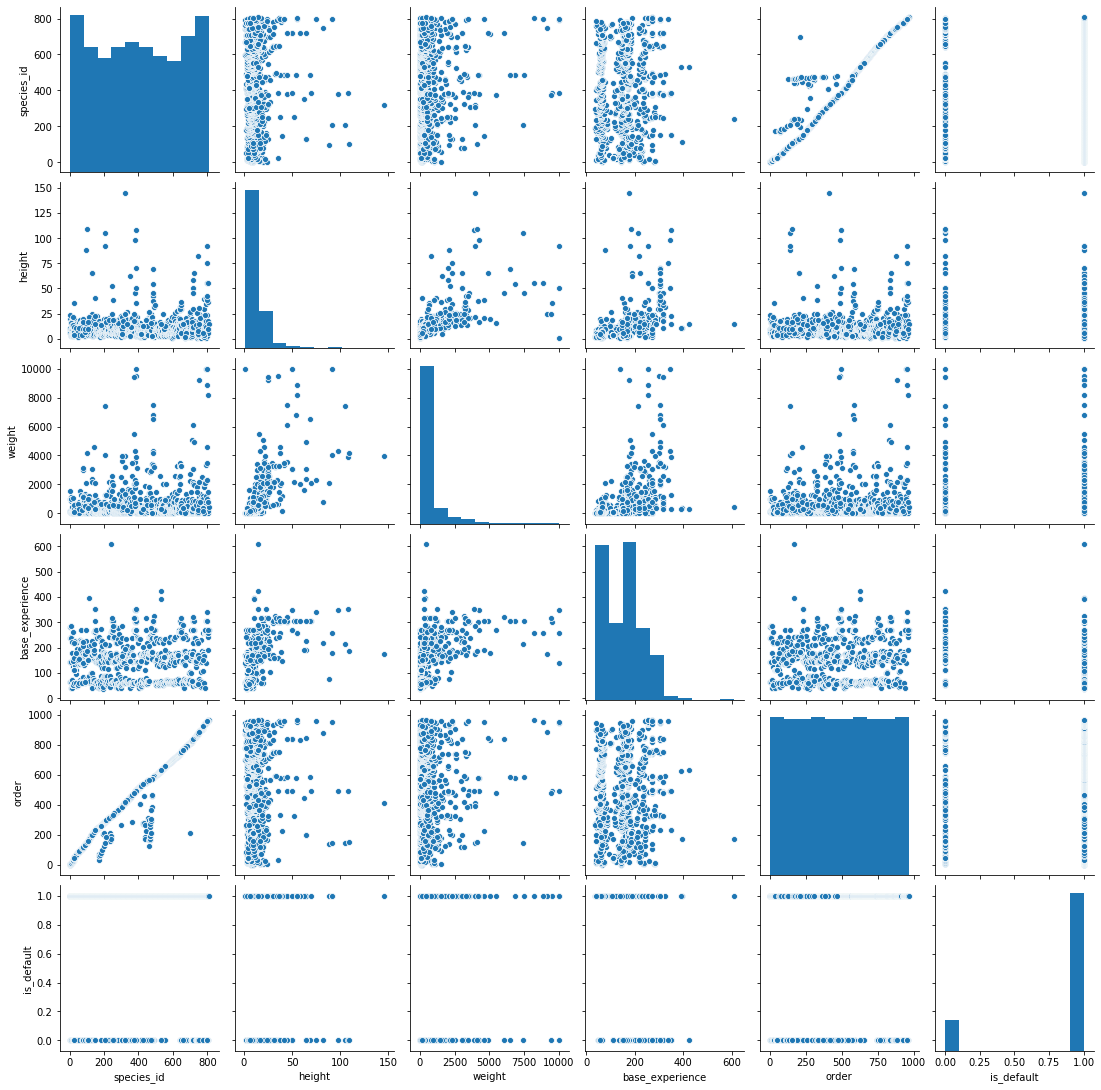

In [38]:
plt.ion()
sns.pairplot(df_pokemon)

We've got interactions that don't make for sensible plots.
* `is_default` is a binary value (1 or 0 aka True or False), a scatter plot doesn't make sense.
* `species_id` while numeric, seems to be an ordinal value (https://en.wikipedia.org/wiki/Ordinal_data), the "distance" between two values is not readily understandable or possibly even comparable.

So let's only select specific columns

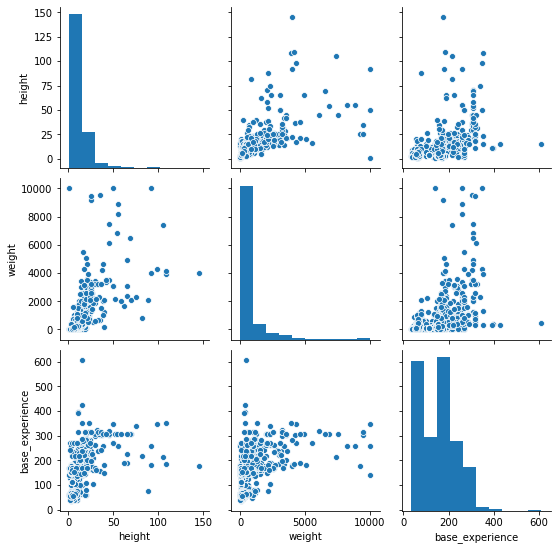

In [39]:
sns.pairplot(df_pokemon[["height", "weight", "base_experience"]])

Looking at the distributions (bar chat looking subplots aka histograms), the distribution of values tend to congregate in clumps.

However for base_experience we've two peaks? Do we perhaps 2 subgroups in our dataset?

In [40]:
def displot(df, column, ax, column2 = None):
    if column2 is not None:
        result = sns.distplot(df[column], df[column2], ax = ax)
    else:
        result = sns.distplot(df[column], ax = ax)
        
    return result

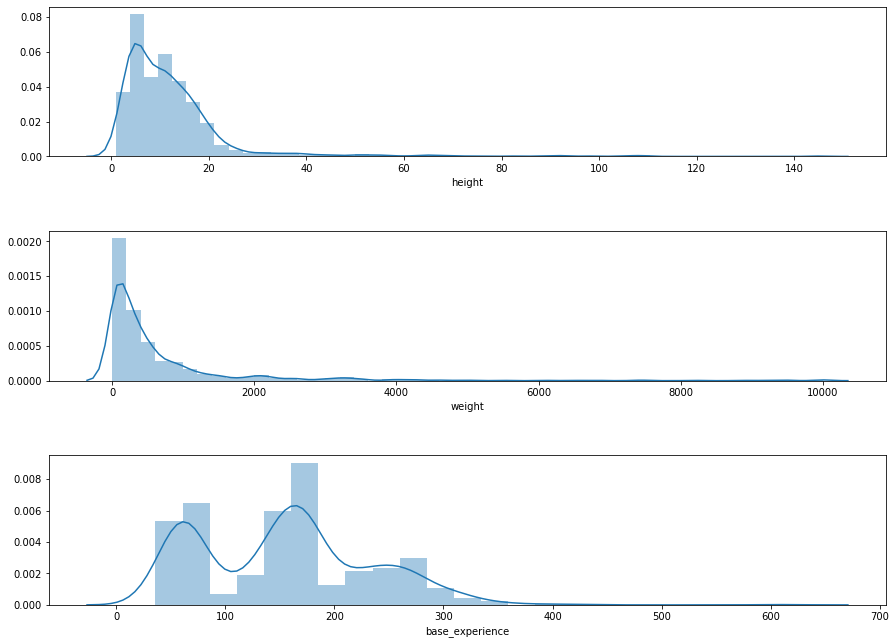

In [41]:
# I want to control the layout of the plots
plt.ioff()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize = (15, 11), sharex=False)
displot(df_pokemon, "height", ax1)
displot(df_pokemon, "weight", ax2)
displot(df_pokemon, "base_experience", ax3)
fig.subplots_adjust(hspace = 0.5)

# Correlations

As you may recall we have a number of Pikachus

In [42]:
df_pikachus

,identifier,species_id,height,weight,base_experience,order,is_default
id,,,,,,,
25,pikachu,25,4,60,112,35,1
10080,pikachu-rock-star,25,4,60,112,37,0
10081,pikachu-belle,25,4,60,112,38,0
10082,pikachu-pop-star,25,4,60,112,39,0
10083,pikachu-phd,25,4,60,112,40,0
10084,pikachu-libre,25,4,60,112,41,0
10085,pikachu-cosplay,25,4,60,112,36,0
10094,pikachu-original-cap,25,4,60,112,42,0
10095,pikachu-hoenn-cap,25,4,60,112,43,0


It seems that there is a relationship between `species_id` and the `id`. All of the Pikachus have a `species_id` of 25, which is the `id` of the first pikachu. 

Let's see what correlations we have in our dataset. Particularly those correlations with the `id`.

The output of `df_pokemon.corr()` will generate a DataFrame of *correlations coefficients* measured from -1.0 to +1.0, indicating the pairwsie relationship between each numerical variable in the DataFrame of pokemons.

*Correlations coefficients* are the measure of the strength and direction of a linear relationship between variables.
* If the value is positive this denotes a positive relationship between the variables, i.e. increasing values of variable a are correlated with increasing values of variable b.

* If the correlation coefficient is closer to 1, it indicates that changes are positively related:
    * As variable a increases in value, variable b tends to increase in value.
    * As variable a decreases in value, variable b tends to decrease in value.
* If the correlation coefficient is closer to 0, it indicates that there isn't a relationship:
    * Changes in variable a don't seem to be related to increasing or decreasing values of b.
* If the correlation coefficient is closer to -1, it indicates that changes are negatively related:
    * As variable a increases in value, variable b tends to decrease in value.
    * As variable a decreases in value, variable b tends to increase in value.

In [43]:
df_pokemon.corr()

,species_id,height,weight,base_experience,order,is_default
species_id,1.000000,0.027057,0.102484,0.138612,0.976883,-0.005692
height,0.027057,1.000000,0.663162,0.491484,0.026653,-0.147441
weight,0.102484,0.663162,1.000000,0.437724,0.100633,-0.109774
base_experience,0.138612,0.491484,0.437724,1.000000,0.127567,-0.271400
order,0.976883,0.026653,0.100633,0.127567,1.000000,-0.016875
is_default,-0.005692,-0.147441,-0.109774,-0.271400,-0.016875,1.000000


But `id` isn't listed above, as we moved `id` to the index - it's not available as a column.

In [44]:
df_pokemon.columns

Index(['identifier', 'species_id', 'height', 'weight', 'base_experience',
       'order', 'is_default'],
      dtype='object')

## Resetting an Index

So let's reset the index back to an automatic incrementing number so we can use `id` as a column again.

In [45]:
df_pokemon = df_pokemon.reset_index()
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default
0,1,bulbasaur,1,7,69,64,1,1
1,2,ivysaur,2,10,130,142,2,1
2,3,venusaur,3,20,1000,236,3,1
3,4,charmander,4,6,85,62,5,1
4,5,charmeleon,5,11,190,142,6,1


In [46]:
df_pokemon.corr()

,id,species_id,height,weight,base_experience,order,is_default
id,1.000000,0.058617,0.148452,0.116083,0.277686,0.068228,-0.998212
species_id,0.058617,1.000000,0.027057,0.102484,0.138612,0.976883,-0.005692
height,0.148452,0.027057,1.000000,0.663162,0.491484,0.026653,-0.147441
weight,0.116083,0.102484,0.663162,1.000000,0.437724,0.100633,-0.109774
base_experience,0.277686,0.138612,0.491484,0.437724,1.000000,0.127567,-0.271400
order,0.068228,0.976883,0.026653,0.100633,0.127567,1.000000,-0.016875
is_default,-0.998212,-0.005692,-0.147441,-0.109774,-0.271400,-0.016875,1.000000


## Correlation Heatmap
This is would be much more effective as a correlation heatmap.

In [47]:
def plot_correlation(df, title, axis, figure_size = (11, 9)):
    global plt
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
        
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    result = sns.heatmap(df.corr(), mask=mask, vmin = -1, vmax= 1, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = axis)
    
    result.set_title(title)
    
    return result

In [48]:
plt.ioff()

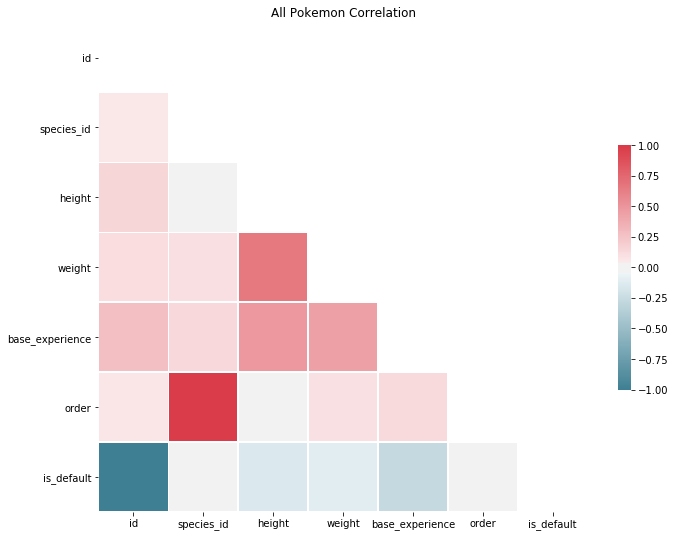

In [49]:
fig, ax1 = plt.subplots(figsize = (11, 9))
plot_correlation(df_pokemon, "All Pokemon Correlation", figure_size = (11, 9), axis = ax1)

There is a strong negative correlation with `is_default` and `id`. Let's look into that.

We know that `id` is a unique value, so lets split the data by the values of `is_default`.

In [50]:
df_pokemon["is_default"].unique()

array([1, 0], dtype=int64)

Lets also look at id where varying values of `is_default`

In [51]:
df_pokemon.query("is_default == 0")["id"].describe()

count      157.000000
mean     10079.000000
std         45.466105
min      10001.000000
25%      10040.000000
50%      10079.000000
75%      10118.000000
max      10157.000000
Name: id, dtype: float64

In [52]:
df_pokemon.query("is_default == 1")["id"].describe()

count    807.000000
mean     404.000000
std      233.105126
min        1.000000
25%      202.500000
50%      404.000000
75%      605.500000
max      807.000000
Name: id, dtype: float64

In [53]:
def display_figure(fig):
    IPython.display.display(fig)

You'll notice below that there aren't any correlations for `is_default` as there aren't any changes for `is_default` in our two subsets.

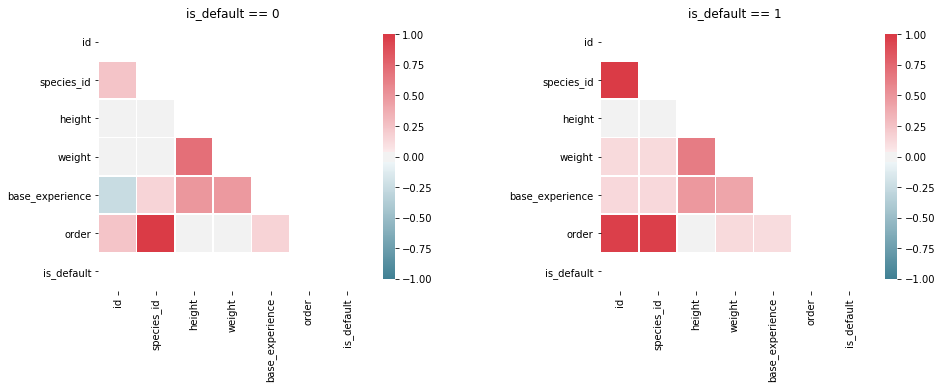

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 9), sharey = False)
plot_correlation(df_pokemon[df_pokemon["is_default"] == 0], "is_default == 0", ax1)
plot_correlation(df_pokemon[df_pokemon["is_default"] == 1], "is_default == 1", ax2)
fig.subplots_adjust(wspace = 0.5)

Where `is_default == 0`
* `height` and `id` - very weak negative correlation 
* `weight` and `id` - very weak negative correlation 
* `base_experience` and `id` - weak negative correlation

Where `is_default == 1`
* `height` and `id` - very weak positive correlation 
* `weight` and `id` - weak positive correlation
* `base_experience` and `id` - weak positive correlation

Let's plot these relationships in some pair plots.

In [55]:
def pair_plot_correlations(df, columns):
    return sns.pairplot(df[columns])

In [56]:
# some oddities around clearing the plot when switching from interactive
# mode off to interactive mode on. Need to look into why
plt.clf()
plt.cla()
plt.close()
plt.clf()
plt.ion()

<Figure size 432x288 with 0 Axes>

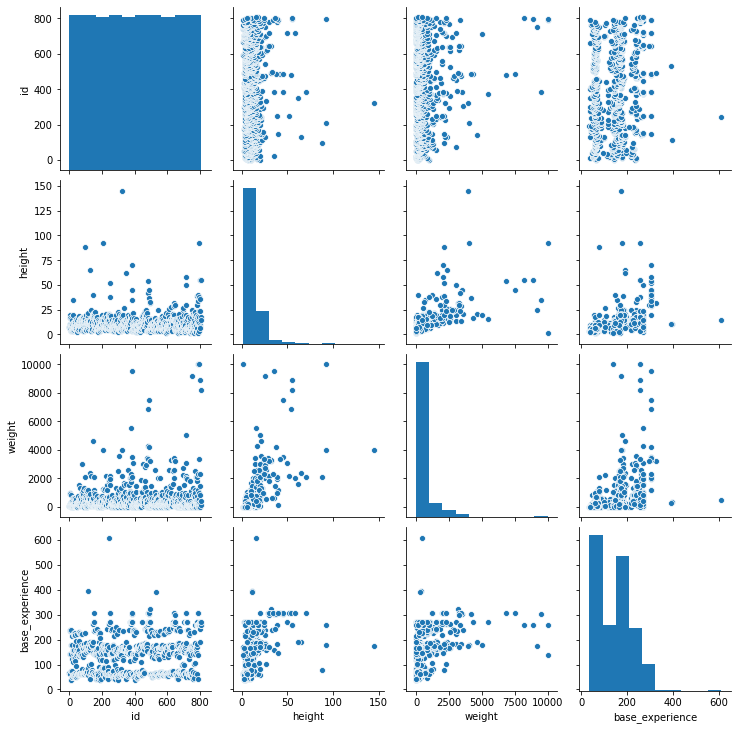

In [57]:
pair_plot_correlations(df_pokemon[df_pokemon["is_default"] == 1], ["id", "height", "weight", "base_experience"])

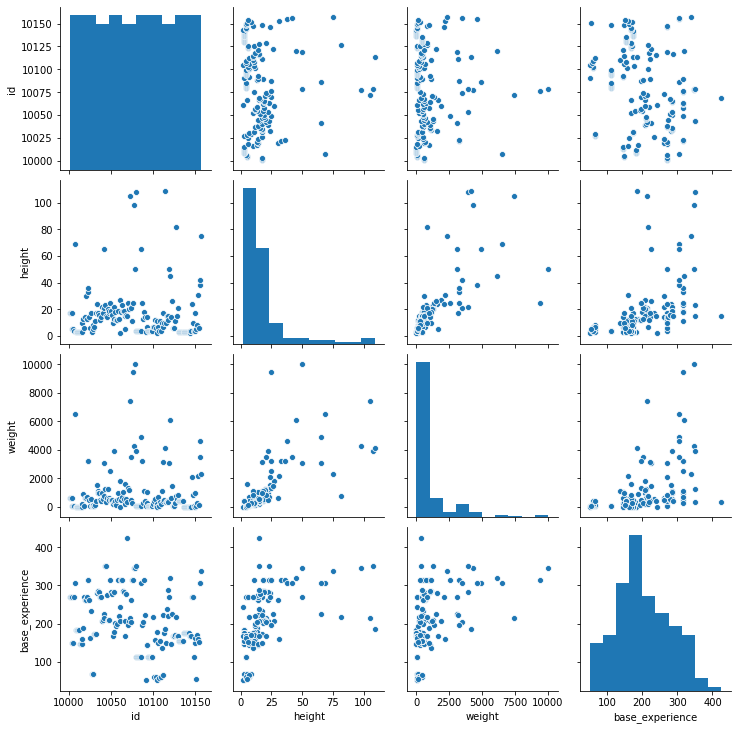

In [58]:
pair_plot_correlations(df_pokemon[df_pokemon["is_default"] == 0], ["id", "height", "weight", "base_experience"])

So are the variants (where the `id ` doesn't match the `species_id`) only different in name or is there some other variation?

In [59]:
variant_pokemon_index = df_pokemon["id"] != df_pokemon["species_id"]
is_default_index = df_pokemon["is_default"] == 1

### get_duplicate_indexes

For a given DataFrame `df` find which rows have duplicated values for the `columns` (an array/list), keeping the first match.

In [60]:
def get_duplicate_indexes(df, columns):
    return df.duplicated(columns, keep = "first")

In [61]:
df_duplicated_pokemon = df_pokemon[
    get_duplicate_indexes(df_pokemon, ["species_id", "height", "weight", "base_experience"])
]

In [62]:
df_duplicated_pokemon

,id,identifier,species_id,height,weight,base_experience,order,is_default
807,10001,deoxys-attack,386,17,608,270,497,0
808,10002,deoxys-defense,386,17,608,270,498,0
809,10003,deoxys-speed,386,17,608,270,499,0
810,10004,wormadam-sandy,413,5,65,148,525,0
811,10005,wormadam-trash,413,5,65,148,526,0
815,10009,rotom-wash,479,3,3,182,571,0
816,10010,rotom-frost,479,3,3,182,572,0
817,10011,rotom-fan,479,3,3,182,573,0
818,10012,rotom-mow,479,3,3,182,574,0
819,10013,castform-sunny,351,3,8,147,447,0


let's omit the rows in `df_pokemon` where the `id` appears in `df_duplicated_pokemon`.

In [63]:
len(df_pokemon)

964

In [64]:
df_pokemon = df_pokemon[~df_pokemon["id"].isin(df_duplicated_pokemon["id"])]

In [65]:
len(df_pokemon)

909

Let's drop the duplciated rows

# Download Additional Pokemon Data

Now that we've gotten a handle on the core Pokemon data lets get some additional data.

In [66]:
def load_pokemon_data(filename):
    url = "https://github.com/veekun/pokedex/raw/master/pokedex/data/csv/"
    download_file(url + filename, filename)
    return pd.read_csv(filename)

# Types

* **id** - Unique ID for Type
* **identifier** - Name of the type
* **generation_id** - When was the type introduced
* **damage_class_id** - ???

In [67]:
df_types = load_pokemon_data("types.csv")
df_types.sample(5)

,id,identifier,generation_id,damage_class_id
16,17,dark,2,3.0
7,8,ghost,1,2.0
6,7,bug,1,2.0
14,15,ice,1,3.0
18,10001,unknown,2,NaN


In [68]:
df_types["id"].is_unique

True

# Pokemon Types

Linking Pokemon to Types

In [69]:
df_pokemon_types = load_pokemon_data("pokemon_types.csv")
df_pokemon_types.sample(5)

,pokemon_id,type_id,slot
198,139,11,2
825,564,11,1
393,271,11,1
786,540,12,2
1167,782,16,1


### Duplicated Pokemon Types

Can a Pokemon have more than 1 type?

In [70]:
duplicate_index = get_duplicate_indexes(df_pokemon_types, ["pokemon_id", "type_id"])
print("number of duplicated rows:", len(df_pokemon_types[duplicate_index]))

number of duplicated rows: 0


# Joining DataFrames

Let's join the seperated datasources, in a fashion not to dissimilar to a SQL style join.

<img src="static/merging_merge_on_key.png">
Credit: Pandas Project - https://pandas.pydata.org/pandas-docs/stable/merging.html#brief-primer-on-merge-methods-relational-algebra

In [71]:
df_pokemon = df_pokemon.merge(df_pokemon_types, left_on="id", right_on="pokemon_id", how="inner")
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default,pokemon_id,type_id,slot
0,1,bulbasaur,1,7,69,64,1,1,1,12,1
1,1,bulbasaur,1,7,69,64,1,1,1,4,2
2,2,ivysaur,2,10,130,142,2,1,2,12,1
3,2,ivysaur,2,10,130,142,2,1,2,4,2
4,3,venusaur,3,20,1000,236,3,1,3,12,1


But now we've got some extranious columns, lets get rid of them.

In [72]:
df_pokemon = df_pokemon.drop(["pokemon_id"], axis = 1)

Speaking of columns, we have columns with the same names in our `df_pokemon` and `df_types` dataframes.

Thankfully we can specify a suffix when merging dataframes.

In [73]:
df_types.columns

Index(['id', 'identifier', 'generation_id', 'damage_class_id'], dtype='object')

In [74]:
df_pokemon.columns

Index(['id', 'identifier', 'species_id', 'height', 'weight', 'base_experience',
       'order', 'is_default', 'type_id', 'slot'],
      dtype='object')

In [75]:
df_pokemon = df_pokemon.merge(df_types, 
                              left_on="type_id", 
                              right_on="id", 
                              how="inner", 
                              suffixes=("", "_type"))
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default,type_id,slot,id_type,identifier_type,generation_id,damage_class_id
0,1,bulbasaur,1,7,69,64,1,1,12,1,12,grass,1,3.0
1,2,ivysaur,2,10,130,142,2,1,12,1,12,grass,1,3.0
2,3,venusaur,3,20,1000,236,3,1,12,1,12,grass,1,3.0
3,43,oddish,43,5,54,64,74,1,12,1,12,grass,1,3.0
4,44,gloom,44,8,86,138,75,1,12,1,12,grass,1,3.0


In [76]:
df_pokemon = df_pokemon.drop(["type_id", "id_type"], axis = 1)
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default,slot,identifier_type,generation_id,damage_class_id
0,1,bulbasaur,1,7,69,64,1,1,1,grass,1,3.0
1,2,ivysaur,2,10,130,142,2,1,1,grass,1,3.0
2,3,venusaur,3,20,1000,236,3,1,1,grass,1,3.0
3,43,oddish,43,5,54,64,74,1,1,grass,1,3.0
4,44,gloom,44,8,86,138,75,1,1,grass,1,3.0


# Grouping and Plotting

Let's get an idea of the distribution of the Pokemon types.

In [77]:
df_pokemon_type_group = df_pokemon[["identifier_type", "identifier"]].groupby(by="identifier_type").size()
df_pokemon_type_group = pd.DataFrame(df_pokemon_type_group)
df_pokemon_type_group

,0
identifier_type,
bug,84
dark,60
dragon,62
electric,58
fairy,55
fighting,62
fire,75
flying,109
ghost,57


So nice to have in our plot:
* Sort the data display so that comparisons are easier, and we have an immediate sense of ranking.
* Make the barplot horizontal so we don't have to tilt our heads sideways.
* Give each bar it's own colour.

In [78]:
df_pokemon_type_group = df_pokemon_type_group.reset_index()
df_pokemon_type_group.columns = ["type", "count"]
df_pokemon_type_group = df_pokemon_type_group.sort_values(by = "count", ascending = False)

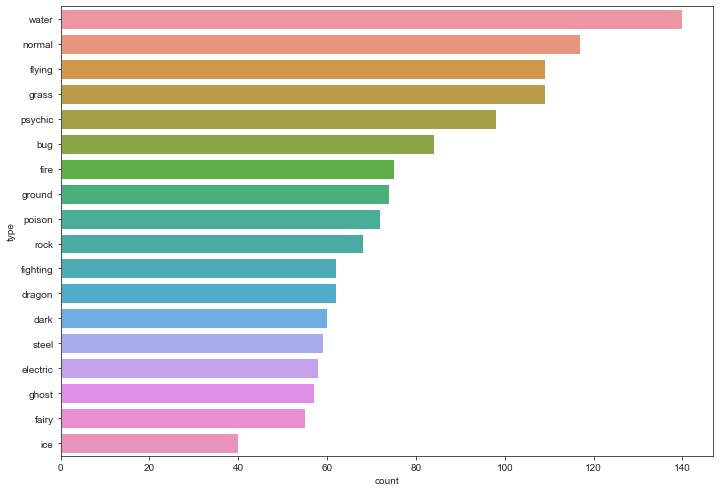

In [79]:
sns.set_style('ticks')

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

locs, labels = plt.xticks()
plt.setp(labels, rotation = 0)

sns.barplot(y="type", x="count", data = df_pokemon_type_group)

# Correlations

A Pokemon has abilities, abilities may be shared amongst pokemon.

## Abilities

In [80]:
df_abilities = load_pokemon_data("abilities.csv")

In [81]:
len(df_abilities)

293

In [82]:
df_abilities.head()

,id,identifier,generation_id,is_main_series
0,1,stench,3,1
1,2,drizzle,3,1
2,3,speed-boost,3,1
3,4,battle-armor,3,1
4,5,sturdy,3,1


## Pokemon to Abilities Mapping

In [83]:
df_pokemon_abilities = load_pokemon_data("pokemon_abilities.csv")

In [84]:
len(df_pokemon_abilities)

2167

In [85]:
len(df_pokemon_abilities)

2167

In [86]:
df_pokemon_abilities.head()

,pokemon_id,ability_id,is_hidden,slot
0,1,65,0,1
1,1,34,1,3
2,2,65,0,1
3,2,34,1,3
4,3,65,0,1


In [87]:
df_pokemon_abilities = pd.merge(df_pokemon_abilities, df_abilities, left_on = "ability_id", right_on = "id", how = "left")

In [88]:
len(df_pokemon_abilities)

2167

In [89]:
df_pokemon_abilities = df_pokemon_abilities[["pokemon_id", "ability_id", "identifier", "slot","is_hidden"]]

In [90]:
df_pokemon_abilities.columns

Index(['pokemon_id', 'ability_id', 'identifier', 'slot', 'is_hidden'], dtype='object')

In [91]:
df_pokemon_abilities.columns = ['pokemon_id', 'ability_id', 'ability_identifier', 'ability_slot', 'ability_is_hidden']

In [92]:
df_pokemon_abilities.head()

,pokemon_id,ability_id,ability_identifier,ability_slot,ability_is_hidden
0,1,65,overgrow,1,0
1,1,34,chlorophyll,3,1
2,2,65,overgrow,1,0
3,2,34,chlorophyll,3,1
4,3,65,overgrow,1,0


In [93]:
df_pokemon.head()

,id,identifier,species_id,height,weight,base_experience,order,is_default,slot,identifier_type,generation_id,damage_class_id
0,1,bulbasaur,1,7,69,64,1,1,1,grass,1,3.0
1,2,ivysaur,2,10,130,142,2,1,1,grass,1,3.0
2,3,venusaur,3,20,1000,236,3,1,1,grass,1,3.0
3,43,oddish,43,5,54,64,74,1,1,grass,1,3.0
4,44,gloom,44,8,86,138,75,1,1,grass,1,3.0


In [94]:
df_pokemon_skills = pd.merge(df_pokemon[["id", "identifier","identifier_type"]], df_pokemon_abilities, left_on = "id", right_on = "pokemon_id", how = "left")
df_pokemon_skills.head()

,id,identifier,identifier_type,pokemon_id,ability_id,ability_identifier,ability_slot,ability_is_hidden
0,1,bulbasaur,grass,1,65,overgrow,1,0
1,1,bulbasaur,grass,1,34,chlorophyll,3,1
2,2,ivysaur,grass,2,65,overgrow,1,0
3,2,ivysaur,grass,2,34,chlorophyll,3,1
4,3,venusaur,grass,3,65,overgrow,1,0


What are the top 5 most common abilities in our pokemon skills dataframe?

In [95]:
ability_counts_df = pd.DataFrame(
    df_pokemon_skills["ability_identifier"].value_counts()
)
ability_counts_df.columns = ["ability_count"]
ability_counts_df.head()

,ability_count
sturdy,71
keen-eye,63
swift-swim,60
chlorophyll,59
levitate,57


# Categorical Data

Working with categorical data, e.g. `identifier_type` sometimes require you to generate 'dummy' values.
That is creating multiple columns of `True` and `False` from a single column

In [96]:
df_pokemon[["identifier", "identifier_type"]].sample(5, random_state  = 42)

,identifier,identifier_type
665,stoutland,normal
624,miltank,normal
115,ekans,poison
478,barbaracle,water
233,talonflame,fire


Looking the sample above we want to create 4 additional columns.

In [97]:
dummy_types_df = pd.get_dummies(df_pokemon["identifier_type"])
dummy_types_df.sample(5)

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
1026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
745,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
753,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
